In [1]:
!pip install --upgrade opencv-python

     |████████████████████████████████| 51.0MB 59kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [13]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,090 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [12]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=3ddf13f39620573d536b67eb1c31bf117b0e2ef5c6d2bbf3a985283a29c9f21d
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [15]:
!pip install easyocr

     |████████████████████████████████| 63.2MB 62kB/s 


In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15132 (delta 26), reused 44 (delta 20), pack-reused 15073
Receiving objects: 100% (15132/15132), 13.50 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (10272/10272), done.


In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

#These lines make Yolo use gpu acceleration 

#!sed -i 's/GPU=0/GPU=1/' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
#!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [4]:
#This command builds darknet so that we can use YOLOv4
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1139:10: note: ...this statement, but the latter is misleadingly indent

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# define helper functions
#This function replaces the built-in cv2 imshow with one that works with google colab
def imShow(image):
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/content
Mounted at /content/gdrive
 CNN	    'Colab Notebooks'   OCR		  yolov4
 CNN_data    images	       'S4 screenshots'   yolov4_ocr
 cnn.ipynb  'My Drive'	        videos


In [7]:
%cd darknet/

/content/darknet


In [8]:
#We copy the config file from the drive to config folder after modifition --Always use this command especially when not training
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg

In [9]:
!pwd

/content/darknet


In [10]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [16]:
import numpy as np
import math
import pytesseract
import re
from easyocr import Reader 

In [17]:
net = cv2.dnn.readNetFromDarknet("/content/darknet/cfg/yolov4-obj.cfg","/mydrive/yolov4/backup/yolov4-obj_last.weights")

In [45]:
img = cv2.imread("/mydrive/images/img2.jpg")
h,w = img.shape[:2]
ln = net.getLayerNames()
ln = [ln[i[0]-1] for i in net.getUnconnectedOutLayers()]

blob = cv2.dnn.blobFromImage(img,1/255.0,(416,416),swapRB=True, crop=False)
net.setInput(blob)
layerOutputs = net.forward(ln)

In [46]:
boxes = []
confidences = []

for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    classId = np.argmax(scores)
    confidence = scores[classId]
    if confidence > 0.3:
      box = detection[0:4]* np.array([w,h,w,h])
      centerX,centerY,width,height = box.astype("int")
      x = int (centerX-(width/2))
      y = int (centerY-(height/2))
      
      boxes.append([x,y,int (width),int (height)])
      confidences.append(float (confidence))

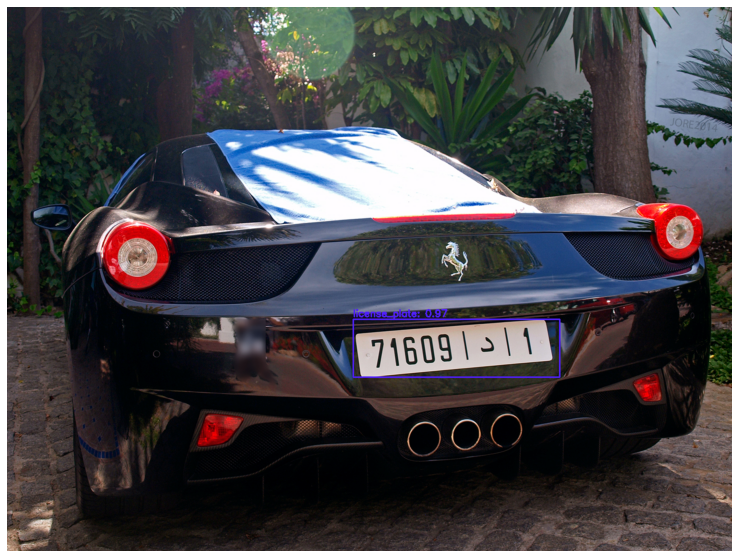

In [47]:
idxs = cv2.dnn.NMSBoxes(boxes,confidences,0.8,0.3)
n = len(idxs)
if n>0:
  for i in idxs.flatten():
    x,y = boxes[i][0],boxes[i][1]
    w,h = boxes[i][2],boxes[i][3]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,32,80),2)
    text = "license_plate: {:.2f}".format(confidences[i])
    cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.6, (255,32,80), 2)
imShow(img)

In [21]:
def skewAngle(src):
  src = cv2.bitwise_not(src)
  lines = cv2.HoughLinesP(src,1,np.pi/180,100,src.shape[1]/2.0,20)
  angle = 0
  for i in range(len(lines)):
    angle += math.atan2(lines[i][0][3]-lines[i][0][1],lines[i][0][2]-lines[i][0][0])
  angle = 180*angle/(len(lines)*np.pi) 
  return angle
#This function deskews the image
def deskew(src):
  (h,w) = src.shape[:2]
  center = (w//2,h//2)
  M = cv2.getRotationMatrix2D(center,skewAngle(src),1.0)
  rotated = cv2.warpAffine(src,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
  return rotated

In [48]:
#plate extraction and roi creation 
plates = []
rois = []
heights = []
if n>0:
  for i in idxs.flatten():
    height = []
    x,y,w,h = boxes[i][0],boxes[i][1],boxes[i][2],boxes[i][3]
    plate = img[y+2:y+h-1,x+2:x+w-1]
    cv2.imwrite("p.jpg",plate)
    plate = cv2.imread("p.jpg",0)
    plate = deskew(plate)
    plate_copy = plate.copy()
    plate_copy = cv2.resize(plate,(1280,720),interpolation=cv2.INTER_LINEAR)
    
    #roi = cv2.adaptiveThreshold(plate,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,255,1)
    
    roi = cv2.threshold(plate,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    finder = cv2.threshold(plate_copy,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    finder = cv2.dilate(finder,kernel,iterations=1)
    roi = cv2.dilate(roi,kernel,iterations=1)
    finder = cv2.fastNlMeansDenoising(finder,10,7,21)
    roi = cv2.fastNlMeansDenoising(roi,10,7,21)

    contours, hierarchy = cv2.findContours(finder,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    for contour in contours:
      x1,y1,w1,h1 = cv2.boundingRect(contour)
      if 0.025<=w1/h1<=0.3:
        if h1<= 280:
          continue
        #cv2.rectangle(plate_copy,(x1,y1),(x1+w1,y1+h1),(0,0,255),2)
        height.append((h1,x1,w1))
      heights.append(height)
    plates.append(plate_copy)
    rois.append(roi)

In [49]:
#Separator algorithm
separators = []
m = len(plates)
for i in range(m):  
  heights[i].sort()
  separators_internal = []
  if heights[i][-1][1]!=0:
    separators_internal.append(heights[i][-1])
  else:
    del(heights[i][-1])
    separators_internal.append(heights[i][-1])
  length = len(heights[i])
  if heights[i][length-2][0]==heights[i][length-3][0]:
    if heights[i][length-2][1]<heights[i][length-3][1]:
      separators_internal.append(heights[i][length-2])
    else:
      separators_internal.append(heights[i][length-3])
  else:
    separators_internal.append(heights[i][length-2])
  if separators_internal[0][1]>separators_internal[0][1]:
    separators_internal[1],separators_internal[0] = separators_internal[0],separators_internal[1]
  separators.append(separators_internal)

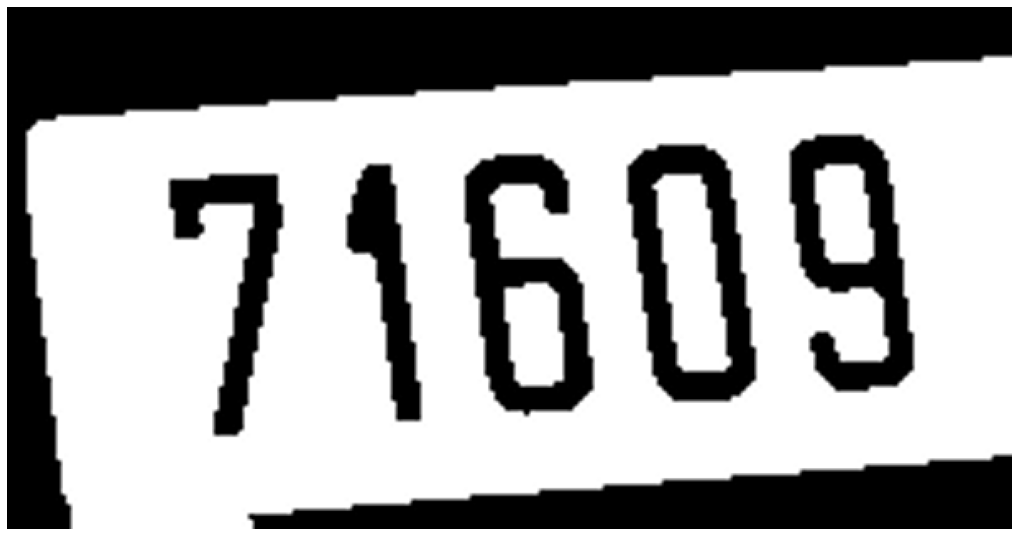

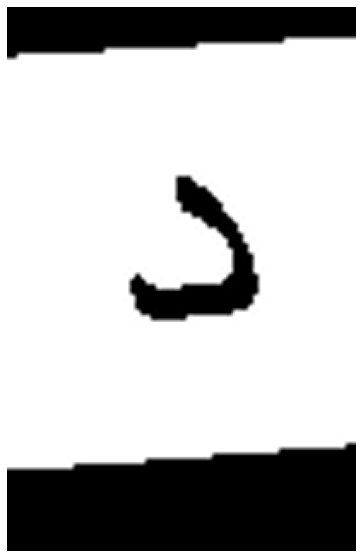

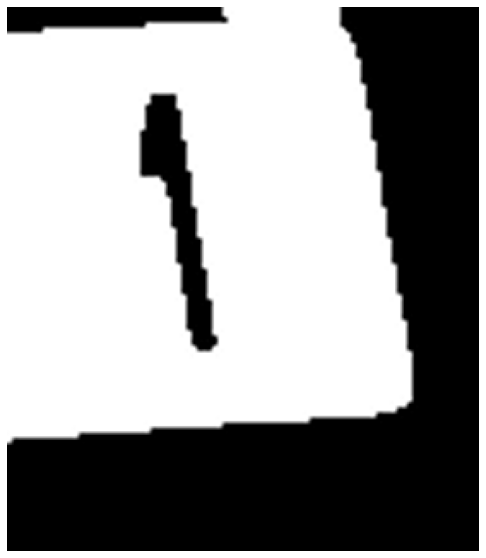

In [50]:
try :
#Dynamic segmentation part : new and enhanced
  zone1s = [] 
  zone2s = []
  zone3s = [] 
  for i in range(m):
    cropped_image = plates[i]
    roi = rois[i]
    ratio = roi.shape[1]/cropped_image.shape[1]
    #Zone 1 crop
    cropped_image1= cropped_image[:,:separators[i][0][1]]
    roi1 = roi[:,:int(separators[i][0][1]*ratio)]
    zone1s.append((cropped_image1,roi1))

    #Zone 2 crop
    cropped_image2 = cropped_image[:,separators[i][0][1]+separators[i][0][2]:separators[i][1][1]]
    roi2 = roi[:,int((separators[i][0][1]+separators[i][0][2])*ratio):int(separators[i][1][1]*ratio)]
    zone2s.append((cropped_image2,roi2))

    #Zone 3 crop
    cropped_image3 = cropped_image[:,separators[i][1][1]+separators[i][1][2]:]
    roi3 = roi[:,int((separators[i][1][1]+separators[i][1][2])*ratio):]
    zone3s.append((cropped_image3,roi3))
    
    imShow(roi1)
    imShow(roi2)
    imShow(roi3)  
  
except:
  #Static Segmentation 
  zone1s = [] 
  zone2s = []
  zone3s = []    
  for i in range(m):
    cropped_image = plates[i]
    roi = rois[i]
    #Zone 1 crop
    cropped_image1= cropped_image[:,:(int)(cropped_image.shape[1]*0.55)]
    roi1 = roi[:,:(int)(roi.shape[1]*0.55)]
    zone1s.append((cropped_image1,roi1))

    #Zone 2 crop
    cropped_image2 = cropped_image[:,(int)(cropped_image.shape[1]*0.58):(int)(cropped_image.shape[1]*0.72)]
    roi2 = roi[:,(int)(roi.shape[1]*0.58):(int)(roi.shape[1]*0.72)]
    zone2s.append((cropped_image2,roi2))

    #Zone 3 crop
    cropped_image3 = cropped_image[:,(int)(cropped_image.shape[1]*0.75):]
    roi3 = roi[:,(int)(roi.shape[1]*0.75):]
    zone3s.append((cropped_image3,roi3))

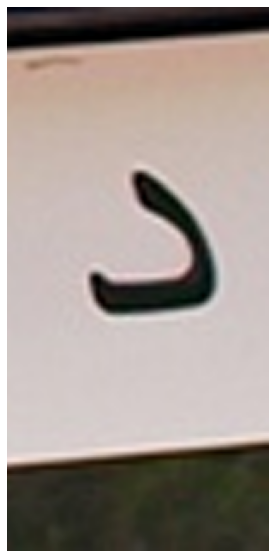

True

In [51]:
im = cv2.imread("p.jpg")
im = im[:,(int)(im.shape[1]*0.58):(int)(im.shape[1]*0.71)]
imShow(im)
cv2.imwrite("/mydrive/images/test3.jpg",im)

In [ ]:
def easyOcrRes(result):
  if len(result)==0 :
    return "" , 0
  max = result[0][2]
  text = result[0][1]
  for res in result :
    if res[2]>max :
      max = res[2]
      text = res[1]
  return text , max

In [ ]:
precisionThreshold = 0.4 

In [ ]:
pres = []

reader = Reader(['en'],gpu=False)

roi = zone1s[0][1][:,:]
result = reader.readtext(roi)
print(result)
zone1text , precision = easyOcrRes(result)
print("precision 1 :" + str(precision))
if precision < precisionThreshold : 
  roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
  result = reader.readtext(roi)
  print(result)
  zone1textPrime , precisionPrime = easyOcrRes(result)
  if precisionPrime > precision :
    zone1text = zone1textPrime
    precision = precisionPrime
    print("precision 2 :" + str(precision))

for char in zone1text:
  if ord(char)<ord('0') or ord(char)>ord('9') and roi.shape != (720,1280):
    roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
    result = reader.readtext(roi)
    print(result)
    zone1text , precision = easyOcrRes(result)
    print("precision 3 :" + str(precision))
    break

pres.append(precision)
roi = zone2s[0][1][:,:]

zone2text = ""
zone2text += pytesseract.image_to_string(roi,lang="letter",config=" --psm 10")
zone2text = re.sub('[\W_]+','',zone2text)

roi = zone3s[0][1][:,:]
result = reader.readtext(roi)
print(result)

zone3text , precision = easyOcrRes(result)
print("precision 1 :" + str(precision))
if precision < precisionThreshold : 
  roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
  result = reader.readtext(roi)
  print(result)
  zone3textPrime , precisionPrime = easyOcrRes(result)
  if precisionPrime> precision :
    zone3text = zone3textPrime
    precision = precisionPrime
    print("precision 2 :" + str(precision))

for char in zone3text:
  if ord(char)<ord('0') or ord(char)>ord('9') and roi.shape != (720,1280):
    roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
    result = reader.readtext(roi)
    print(result)
    zone3text , precision = easyOcrRes(result)
    print("precision 3 :" + str(precision))
    break
pres.append(precision)
text = zone1text + " " + zone2text + "\t" + zone3text

Using CPU. Note: This module is much faster with a GPU.


[([[29, 11], [113, 11], [113, 51], [29, 51]], '37947', 0.9931712252787579)]
precision 1 :0.9931712252787579
[([[4, 14], [30, 14], [30, 46], [4, 46]], "'6", 0.47323623296106243)]
precision 1 :0.47323623296106243
[([[297, 157], [555, 157], [555, 449], [297, 449]], '6', 0.973370467963889)]
precision 3 :0.973370467963889


In [ ]:
print(text)
print(pres)

37947 د	6
[0.9931712252787579, 0.973370467963889]


In [ ]:
presPrime = []

reader = Reader(['en'],gpu=False)

roi = zone1s[0][0][:,:]
result = reader.readtext(roi)
print(result)
zone1textNoOp , precisionNoOp = easyOcrRes(result)
print("precision 1 :" + str(precisionNoOp))
if precisionNoOp < precisionThreshold : 
  roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
  result = reader.readtext(roi)
  print(result)
  zone1textPrime , precisionPrime = easyOcrRes(result)
  if precisionPrime > precisionNoOp :
    zone1textNoOp = zone1textPrime
    precisionNoOp = precisionPrime
    print("precision 2 :" + str(precisionNoOp))

for char in zone1textNoOp:
  if ord(char)<ord('0') or ord(char)>ord('9') and roi.shape != (720,1280):
    roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
    result = reader.readtext(roi)
    print(result)
    zone1textNoOp , precisionNoOp = easyOcrRes(result)
    print("precision 3 :" + str(precisionNoOp))
    break

presPrime.append(precisionNoOp)

roi = zone3s[0][0][:,:]
result = reader.readtext(roi)
print(result)

zone3textNoOp , precisionNoOp = easyOcrRes(result)
print("precision 1 :" + str(precisionNoOp))
if precisionNoOp < precisionThreshold : 
  roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
  result = reader.readtext(roi)
  print(result)
  zone3textPrime , precisionPrime = easyOcrRes(result)
  if precisionPrime> precisionNoOp :
    zone3textNoOp = zone3textPrime
    precisionNoOp = precisionPrime
    print("precision 2 :" + str(precisionNoOp))

for char in zone3textNoOp:
  if ord(char)<ord('0') or ord(char)>ord('9') and roi.shape != (720,1280):
    roi = cv2.resize(roi,(1280,720),interpolation = cv2.INTER_LINEAR)    
    result = reader.readtext(roi)
    print(result)
    zone3textNoOp , precisionNoOp = easyOcrRes(result)
    print("precision 3 :" + str(precisionNoOp))
    break
presPrime.append(precisionNoOp)

textPrime = zone1textNoOp + " " + zone2text + "\t" + zone3textNoOp

Using CPU. Note: This module is much faster with a GPU.


[([[163, 134], [710, 134], [710, 491], [163, 491]], '37947', 0.59436949442024)]
precision 1 :0.59436949442024
[([[0, 158], [172, 158], [172, 464], [0, 464]], '6', 0.985309711701067)]
precision 1 :0.985309711701067


In [ ]:
print(textPrime)
print(presPrime)

37947 د	6
[0.59436949442024, 0.985309711701067]


In [ ]:
finalZone1 = ""
finalZone3 = ""
finalPres = []
if presPrime[0]>pres[0] :
  finalZone1 = zone1textNoOp
  finalPres.append(presPrime[0])
elif presPrime[0]<pres[0] :
  finalZone1 = zone1text
  finalPres.append(pres[0])

if presPrime[1]>pres[1] :
  finalZone3 = zone3textNoOp
  finalPres.append(presPrime[1])
elif presPrime[1]<pres[1] :
  finalZone3 = zone3text
  finalPres.append(pres[1])


In [ ]:
finalText = finalZone1 + " " + zone2text + "\t" + finalZone3

In [ ]:
print(finalText)
print(finalPres)

37947 د	6
[0.9931712252787579, 0.985309711701067]
